In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
pip install tensorflow


  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 68.3 kB/s eta 0:00:00a 0:00:01
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 375.6 kB/s eta 0:00:00a 0:00:01
  Using cached urllib3-2.2.1-py3-none-any.whl.metadata (6.4 kB)
  Using cached certifi-2024.2.2-py3-none-any.whl.metadata (2.2 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 163.0/227.1 MB 8.2

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


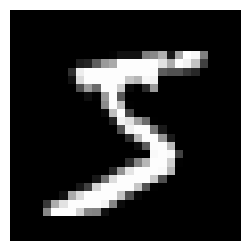

Label: 5


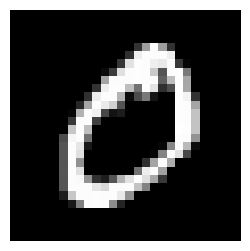

Label: 0


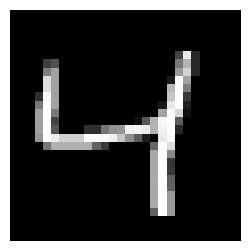

Label: 4


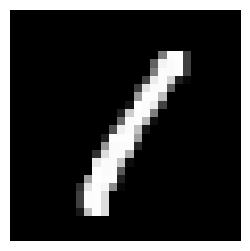

Label: 1


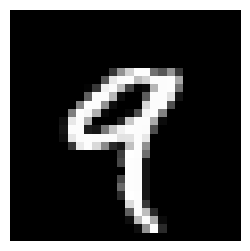

Label: 9


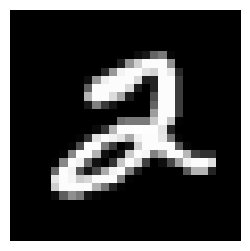

Label: 2


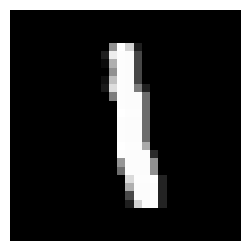

Label: 1


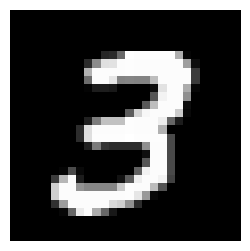

Label: 3


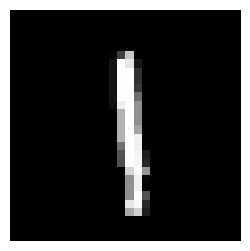

Label: 1


In [21]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Define a function to plot an image
def plot_image(image, figsize=(3, 3)):  # Adjust figsize for desired image size
    plt.figure(figsize=figsize)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()

# Visualize some training images (modify range for more/less images)
for i in range(9):
    plot_image(x_train[i])
    print(f"Label: {y_train[i]}") 

In [22]:
# Reshape for CNN input (28x28 pixels and 1 color channel)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize pixel values to [0, 1] range
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [23]:
# Convert labels to one-hot vectors for multiclass classification
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 output units for 10 digits
])


In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 71s 34ms/step - loss: 0.5920 - accuracy: 0.8093 - val_loss: 0.2536 - val_accuracy: 0.9262
Epoch 2/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1952 - accuracy: 0.9408 - val_loss: 0.1406 - val_accuracy: 0.9574
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1255 - accuracy: 0.9619 - val_loss: 0.0997 - val_accuracy: 0.9681
Epoch 4/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0952 - accuracy: 0.9708 - val_loss: 0.0725 - val_accuracy: 0.9783
Epoch 5/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0780 - accuracy: 0.9758 - val_loss: 0.0683 - val_accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0661 - accuracy: 0.9788 - val_loss: 0.0591 - val_accuracy: 0.9820
Epoch 7/10
1875/1875 [==============================] - 91s 48ms/step - loss: 0.0586 - accuracy: 0.9822 - val_loss: 0.0710

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Confusion Matrix:")
print(cm)


In [ ]:
import numpy as np

accuracy = np.mean(y_test.argmax(axis=1) == y_pred.argmax(axis=1))
print("Accuracy:", accuracy)


In [ ]:
# Make predictions on a small subset of test data
predictions = model.predict(x_test[:10])

# Get the predicted class for each sample (argmax gives the index of maximum value)
predicted_classes = predictions.argmax(axis=1)

# Get the actual labels from the one-hot encoded test data
actual_labels = y_test[:10].argmax(axis=1)

# Print the predicted and actual labels for the first 10 samples
print("Sample Predictions and Actual Labels:")
for i in range(10):
    print(f"Sample {i+1}: Predicted: {predicted_classes[i]}, Actual: {actual_labels[i]}")
